In [ ]:
# pip install beautifulsoup4,seleniumBase # installing beautifulsoup and seleniumBase


# The data keeps updating in every few days so I am saving the current dataFrame to a CSV file on 6/11/2023, So that my data doesn't change.

In [22]:
from bs4 import BeautifulSoup # importing beautifulSoup, numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from seleniumbase import Driver # importing drivers from seleniumBase
driver = Driver()
driver.maximize_window()
from selenium.webdriver.common.by import By # importing By from selenium.webdriver.common.by to open a new selenium browser.

In [3]:
url = "https://www.naukri.com/data-scientist-jobs-in-bangalore-bengaluru?k=data%20scientist&l=bangalore%2Fbengaluru&experience=2&nignbevent_src=jobsearchDeskGNB"
driver.get(url) # Using this step we will be adding the above url to the selenium browser for scraping.  

In [4]:
ID = driver.find_elements(By.XPATH,"//div[@class = 'srp-jobtuple-wrapper']")
data = [] # Here I scraped all the job Id's in that page which gave me all the required information.  
for i in ID:
    data.append(i.text)
data

['GN - Strategy - MC - T&O - NLP Data Science - Analyst\nAccenture\n4.0\n43000 Reviews\n1-3 Yrs\nNot disclosed\nBangalore/Bengaluru, Mumbai, Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram, Chennai\nREQUIRED EXPERIENCE/ SKILLSA global network where only state-of-the-art tools and techn...\nChange managementSASCodingData miningPythonRstatistic techniquesDebugging\n20 Days Ago\nSave',
 'Sr . Data Scientist\nEnlink\n1.0\n2 Reviews\n2-5 Yrs\nNot disclosed\nBangalore/Bengaluru, Mumbai, Navi Mumbai, Hyderabad/Secunderabad, Pune, Chennai\nThe ideal candidate should possess strong JAVA development skills and a solid understan...\nComputer scienceFront endData modelingMISJavascriptData structuresHTMLUnit testing\n3 Days Ago\nSave',
 'Data Scientist\nSiemens\n4.2\n3969 Reviews\n2-6 Yrs\nNot disclosed\nBangalore/Bengaluru\n. Bachelorsdegree in a related field (e.g., Computer Science, Statistics, Mathematics, ...\nData analysisdata scienceAnalyticalMachine learningDownstream processingpower biPredi

In [5]:
len(data) # Here I checked the length of data

20

In [6]:
# I created a new list named new_data, used for loop to iterate and used spilit function to split individual job openings. 

new_data = [] # I created a new list named new_data 
for i in range(len(data)):
    data_list = data[i].split('\n')
    new_data.append(data_list)
# Print the list
for item in new_data:
    print(item) # When I run this code I get all 20 job openings in seperate lists. 

['GN - Strategy - MC - T&O - NLP Data Science - Analyst', 'Accenture', '4.0', '43000 Reviews', '1-3 Yrs', 'Not disclosed', 'Bangalore/Bengaluru, Mumbai, Hyderabad/Secunderabad, Pune, Gurgaon/Gurugram, Chennai', 'REQUIRED EXPERIENCE/ SKILLSA global network where only state-of-the-art tools and techn...', 'Change managementSASCodingData miningPythonRstatistic techniquesDebugging', '20 Days Ago', 'Save']
['Sr . Data Scientist', 'Enlink', '1.0', '2 Reviews', '2-5 Yrs', 'Not disclosed', 'Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyderabad/Secunderabad, Pune, Chennai', 'The ideal candidate should possess strong JAVA development skills and a solid understan...', 'Computer scienceFront endData modelingMISJavascriptData structuresHTMLUnit testing', '3 Days Ago', 'Save']
['Data Scientist', 'Siemens', '4.2', '3969 Reviews', '2-6 Yrs', 'Not disclosed', 'Bangalore/Bengaluru', '. Bachelorsdegree in a related field (e.g., Computer Science, Statistics, Mathematics, ...', 'Data analysisdata scienceAnal

In [7]:
new_data[1] = ['Sr . Data Scientist', 'Enlink', '?', '?', '2-5 Yrs', 'Not disclosed', 'Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyderabad/Secunderabad, Pune, Chennai', 'The ideal candidate should possess strong JAVA development skills and a solid understan...', 'Computer scienceFront endData modelingMISJavascriptData structuresHTMLUnit testing', '2 Days Ago', 'Save']


In [8]:
new_data[5] = ['Data Scientist', 'Careernet Technologies','?','?', '2-7 Yrs', 'Not disclosed', 'Hybrid - Bangalore/Bengaluru', 'Experience in data mining techniques and methodologies. (data prep / modeling, classifi...', 'pythonAWSSQLData MiningMachine LearningDeep LearningDataMachine', '26 Days Ago', 'Save']

In [9]:
new_data[16] = ['Solution Architect', 'Scribble Data','?', '?', '1-2 Yrs', 'Not disclosed', 'Bangalore/Bengaluru, Kolkata, Mumbai, New Delhi, Hyderabad/Secunderabad, Pune, Chennai', 'Experience developing and implementing best-in-class algorithms for multiple among user...', 'NoSQLdata scienceTime series analysisCustomer engagementMATLABSolution ArchitectSQLPython', '30+ Days Ago', 'Save']


In [10]:
df = pd.DataFrame(new_data)
df.columns = ['Job Title', 'Company', 'Rating', 'Reviews', 'Experience', 'Salary', 'Location', 'Job Description', 'Skills', 'Posted', 'Save']
df.to_csv('job_portal.csv',index=False)
df # Here when I am running the code and empty values in Ratings and Reviews are showing as "?" 

,Job Title,Company,Rating,Reviews,Experience,Salary,Location,Job Description,Skills,Posted,Save
0,GN - Strategy - MC - T&O - NLP Data Science - ...,Accenture,4.0,43000 Reviews,1-3 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...",REQUIRED EXPERIENCE/ SKILLSA global network wh...,Change managementSASCodingData miningPythonRst...,20 Days Ago,Save
1,Sr . Data Scientist,Enlink,?,?,2-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyde...",The ideal candidate should possess strong JAVA...,Computer scienceFront endData modelingMISJavas...,2 Days Ago,Save
2,Data Scientist,Siemens,4.2,3969 Reviews,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,". Bachelorsdegree in a related field (e.g., Co...",Data analysisdata scienceAnalyticalMachine lea...,8 Days Ago,Save
3,Data Scientist,Response Informatics,3.9,15 Reviews,0-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Proficient with databases and data stores espe...,deep learningTDDDeploymentNatural language pro...,21 Days Ago,Save
4,Data Scientist,Siemens,4.2,3969 Reviews,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,good German skills are desirable . With your a...,Data analysisSASMachine learningHealthcareGerm...,16 Days Ago,Save
5,Data Scientist,Careernet Technologies,?,?,2-7 Yrs,Not disclosed,Hybrid - Bangalore/Bengaluru,Experience in data mining techniques and metho...,pythonAWSSQLData MiningMachine LearningDeep Le...,26 Days Ago,Save
6,Data Scientist,Nestle,4.1,1886 Reviews,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,"Undertaking data collection, preprocessing and...",advanced analyticsAutomationOperations researc...,28 Days Ago,Save
7,Data Scientist,Infosys,3.9,29417 Reviews,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,Industry knowledge- Knows basic principles of ...,Data ScienceRSASSPSSForecastingPythonSQLData,30+ Days Ago,Save
8,Data Scientist,Visa Inc,4.2,14 Reviews,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,Basic Qualifications: . 2-4 years of relevant ...,C++orchestrationLinuxArchitectureSCALAOpen sou...,30+ Days Ago,Save
9,MACHINE LEARNING / DATA SCIENCE TRAINER,Ethnotech Academy,3.8,18 Reviews,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,"Data Science, Machine Learning, Python, Traini...",Trainingdeep learningtableaudata scienceCoding...,30+ Days Ago,Save


# This is the CSV file. 

In [112]:
df = pd.read_csv('job_portal.csv')
df

,Job Title,Company,Rating,Reviews,Experience,Salary,Location,Job Description,Skills,Posted,Save
0,GN - Strategy - MC - T&O - NLP Data Science - ...,Accenture,4.0,43000 Reviews,1-3 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...",REQUIRED EXPERIENCE/ SKILLSA global network wh...,Change managementSASCodingData miningPythonRst...,20 Days Ago,Save
1,Sr . Data Scientist,Enlink,?,?,2-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyde...",The ideal candidate should possess strong JAVA...,Computer scienceFront endData modelingMISJavas...,2 Days Ago,Save
2,Data Scientist,Siemens,4.2,3969 Reviews,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,". Bachelorsdegree in a related field (e.g., Co...",Data analysisdata scienceAnalyticalMachine lea...,8 Days Ago,Save
3,Data Scientist,Response Informatics,3.9,15 Reviews,0-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Proficient with databases and data stores espe...,deep learningTDDDeploymentNatural language pro...,21 Days Ago,Save
4,Data Scientist,Siemens,4.2,3969 Reviews,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,good German skills are desirable . With your a...,Data analysisSASMachine learningHealthcareGerm...,16 Days Ago,Save
5,Data Scientist,Careernet Technologies,?,?,2-7 Yrs,Not disclosed,Hybrid - Bangalore/Bengaluru,Experience in data mining techniques and metho...,pythonAWSSQLData MiningMachine LearningDeep Le...,26 Days Ago,Save
6,Data Scientist,Nestle,4.1,1886 Reviews,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,"Undertaking data collection, preprocessing and...",advanced analyticsAutomationOperations researc...,28 Days Ago,Save
7,Data Scientist,Infosys,3.9,29417 Reviews,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,Industry knowledge- Knows basic principles of ...,Data ScienceRSASSPSSForecastingPythonSQLData,30+ Days Ago,Save
8,Data Scientist,Visa Inc,4.2,14 Reviews,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,Basic Qualifications: . 2-4 years of relevant ...,C++orchestrationLinuxArchitectureSCALAOpen sou...,30+ Days Ago,Save
9,MACHINE LEARNING / DATA SCIENCE TRAINER,Ethnotech Academy,3.8,18 Reviews,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,"Data Science, Machine Learning, Python, Traini...",Trainingdeep learningtableaudata scienceCoding...,30+ Days Ago,Save


In [113]:
# # Managed the data by replacing "?" in the missing area  
# new_data[3] = ['Sr . Data Scientist', 'Enlink',"?","?", '2-5 Yrs', 'Not disclosed', 'Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyderabad/Secunderabad, Pune, Chennai', 'The ideal candidate should possess strong JAVA development skills and a solid understan...', 'Computer scienceFront endData modelingMISJavascriptData structuresHTMLUnit testing', 'Few Hours Ago', 'Save']
# # new_data[8] = ['Data Scientist', 'Careernet Technologies',"?","?", '2-7 Yrs', 'Not disclosed', 'Hybrid - Bangalore/Bengaluru', 'Experience in data mining techniques and methodologies. (data prep / modeling, classifi...', 'python AWS SQL Data Mining Machine Learning Deep Learning Data Machine', '23 Days Ago', 'Save']
# new_data[18] = ['Solution Architect', 'Scribble Data',"?","?", '1-2 Yrs', 'Not disclosed', 'Bangalore/Bengaluru, Kolkata, Mumbai, New Delhi, Hyderabad/Secunderabad, Pune, Chennai', 'Experience developing and implementing best-in-class algorithms for multiple among user...', 'NoSQLdata scienceTime series analysisCustomer engagementMATLABSolution ArchitectSQLPython', '30+ Days Ago', 'Save']

In [114]:
df.replace('?',np.nan, inplace = True) # I have replaced "?" to NaN values so that I can further manage the data.
df

,Job Title,Company,Rating,Reviews,Experience,Salary,Location,Job Description,Skills,Posted,Save
0,GN - Strategy - MC - T&O - NLP Data Science - ...,Accenture,4.0,43000 Reviews,1-3 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...",REQUIRED EXPERIENCE/ SKILLSA global network wh...,Change managementSASCodingData miningPythonRst...,20 Days Ago,Save
1,Sr . Data Scientist,Enlink,NaN,NaN,2-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyde...",The ideal candidate should possess strong JAVA...,Computer scienceFront endData modelingMISJavas...,2 Days Ago,Save
2,Data Scientist,Siemens,4.2,3969 Reviews,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,". Bachelorsdegree in a related field (e.g., Co...",Data analysisdata scienceAnalyticalMachine lea...,8 Days Ago,Save
3,Data Scientist,Response Informatics,3.9,15 Reviews,0-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Proficient with databases and data stores espe...,deep learningTDDDeploymentNatural language pro...,21 Days Ago,Save
4,Data Scientist,Siemens,4.2,3969 Reviews,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,good German skills are desirable . With your a...,Data analysisSASMachine learningHealthcareGerm...,16 Days Ago,Save
5,Data Scientist,Careernet Technologies,NaN,NaN,2-7 Yrs,Not disclosed,Hybrid - Bangalore/Bengaluru,Experience in data mining techniques and metho...,pythonAWSSQLData MiningMachine LearningDeep Le...,26 Days Ago,Save
6,Data Scientist,Nestle,4.1,1886 Reviews,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,"Undertaking data collection, preprocessing and...",advanced analyticsAutomationOperations researc...,28 Days Ago,Save
7,Data Scientist,Infosys,3.9,29417 Reviews,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,Industry knowledge- Knows basic principles of ...,Data ScienceRSASSPSSForecastingPythonSQLData,30+ Days Ago,Save
8,Data Scientist,Visa Inc,4.2,14 Reviews,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,Basic Qualifications: . 2-4 years of relevant ...,C++orchestrationLinuxArchitectureSCALAOpen sou...,30+ Days Ago,Save
9,MACHINE LEARNING / DATA SCIENCE TRAINER,Ethnotech Academy,3.8,18 Reviews,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,"Data Science, Machine Learning, Python, Traini...",Trainingdeep learningtableaudata scienceCoding...,30+ Days Ago,Save


In [115]:
df.shape # Here I checked number of rows and columns.

(20, 11)

In [116]:
# Remove non-numeric values from 'reviews' column
df['Reviews'] = df['Reviews'].str.replace(r'\D', '', regex = True) # Infuture update we have to add regex=True after ''
# Change the object type to float
df['Reviews'] = df['Reviews'].astype(float)
df

,Job Title,Company,Rating,Reviews,Experience,Salary,Location,Job Description,Skills,Posted,Save
0,GN - Strategy - MC - T&O - NLP Data Science - ...,Accenture,4.0,43000.0,1-3 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...",REQUIRED EXPERIENCE/ SKILLSA global network wh...,Change managementSASCodingData miningPythonRst...,20 Days Ago,Save
1,Sr . Data Scientist,Enlink,NaN,NaN,2-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyde...",The ideal candidate should possess strong JAVA...,Computer scienceFront endData modelingMISJavas...,2 Days Ago,Save
2,Data Scientist,Siemens,4.2,3969.0,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,". Bachelorsdegree in a related field (e.g., Co...",Data analysisdata scienceAnalyticalMachine lea...,8 Days Ago,Save
3,Data Scientist,Response Informatics,3.9,15.0,0-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Proficient with databases and data stores espe...,deep learningTDDDeploymentNatural language pro...,21 Days Ago,Save
4,Data Scientist,Siemens,4.2,3969.0,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,good German skills are desirable . With your a...,Data analysisSASMachine learningHealthcareGerm...,16 Days Ago,Save
5,Data Scientist,Careernet Technologies,NaN,NaN,2-7 Yrs,Not disclosed,Hybrid - Bangalore/Bengaluru,Experience in data mining techniques and metho...,pythonAWSSQLData MiningMachine LearningDeep Le...,26 Days Ago,Save
6,Data Scientist,Nestle,4.1,1886.0,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,"Undertaking data collection, preprocessing and...",advanced analyticsAutomationOperations researc...,28 Days Ago,Save
7,Data Scientist,Infosys,3.9,29417.0,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,Industry knowledge- Knows basic principles of ...,Data ScienceRSASSPSSForecastingPythonSQLData,30+ Days Ago,Save
8,Data Scientist,Visa Inc,4.2,14.0,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,Basic Qualifications: . 2-4 years of relevant ...,C++orchestrationLinuxArchitectureSCALAOpen sou...,30+ Days Ago,Save
9,MACHINE LEARNING / DATA SCIENCE TRAINER,Ethnotech Academy,3.8,18.0,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,"Data Science, Machine Learning, Python, Traini...",Trainingdeep learningtableaudata scienceCoding...,30+ Days Ago,Save


In [117]:
# pd.to_numeric() function is used to convert the column to a numeric type and convert non_numeric number to NaN
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce') 
df

,Job Title,Company,Rating,Reviews,Experience,Salary,Location,Job Description,Skills,Posted,Save
0,GN - Strategy - MC - T&O - NLP Data Science - ...,Accenture,4.0,43000.0,1-3 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...",REQUIRED EXPERIENCE/ SKILLSA global network wh...,Change managementSASCodingData miningPythonRst...,20 Days Ago,Save
1,Sr . Data Scientist,Enlink,NaN,NaN,2-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyde...",The ideal candidate should possess strong JAVA...,Computer scienceFront endData modelingMISJavas...,2 Days Ago,Save
2,Data Scientist,Siemens,4.2,3969.0,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,". Bachelorsdegree in a related field (e.g., Co...",Data analysisdata scienceAnalyticalMachine lea...,8 Days Ago,Save
3,Data Scientist,Response Informatics,3.9,15.0,0-5 Yrs,Not disclosed,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Proficient with databases and data stores espe...,deep learningTDDDeploymentNatural language pro...,21 Days Ago,Save
4,Data Scientist,Siemens,4.2,3969.0,2-6 Yrs,Not disclosed,Bangalore/Bengaluru,good German skills are desirable . With your a...,Data analysisSASMachine learningHealthcareGerm...,16 Days Ago,Save
5,Data Scientist,Careernet Technologies,NaN,NaN,2-7 Yrs,Not disclosed,Hybrid - Bangalore/Bengaluru,Experience in data mining techniques and metho...,pythonAWSSQLData MiningMachine LearningDeep Le...,26 Days Ago,Save
6,Data Scientist,Nestle,4.1,1886.0,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,"Undertaking data collection, preprocessing and...",advanced analyticsAutomationOperations researc...,28 Days Ago,Save
7,Data Scientist,Infosys,3.9,29417.0,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,Industry knowledge- Knows basic principles of ...,Data ScienceRSASSPSSForecastingPythonSQLData,30+ Days Ago,Save
8,Data Scientist,Visa Inc,4.2,14.0,2-4 Yrs,Not disclosed,Bangalore/Bengaluru,Basic Qualifications: . 2-4 years of relevant ...,C++orchestrationLinuxArchitectureSCALAOpen sou...,30+ Days Ago,Save
9,MACHINE LEARNING / DATA SCIENCE TRAINER,Ethnotech Academy,3.8,18.0,2-5 Yrs,Not disclosed,Bangalore/Bengaluru,"Data Science, Machine Learning, Python, Traini...",Trainingdeep learningtableaudata scienceCoding...,30+ Days Ago,Save


In [118]:
df['Rating'].fillna(value=df['Rating'].mean(), inplace=True) # fillings 
df['Reviews'].fillna(value=df['Reviews'].mean(), inplace=True)
df['Rating'] = df['Rating'].round(1)
df['Reviews'] = df['Reviews'].round(1)


In [119]:
df['Experience'] = df['Experience'].str.replace(r'\D', '', regex = True) # Infuture update we have to add regex=True after ''
# Change the object type to float
df['Experience'] = df['Experience'].astype(float)
df

,Job Title,Company,Rating,Reviews,Experience,Salary,Location,Job Description,Skills,Posted,Save
0,GN - Strategy - MC - T&O - NLP Data Science - ...,Accenture,4.0,43000.0,13.0,Not disclosed,"Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...",REQUIRED EXPERIENCE/ SKILLSA global network wh...,Change managementSASCodingData miningPythonRst...,20 Days Ago,Save
1,Sr . Data Scientist,Enlink,3.9,5226.6,25.0,Not disclosed,"Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyde...",The ideal candidate should possess strong JAVA...,Computer scienceFront endData modelingMISJavas...,2 Days Ago,Save
2,Data Scientist,Siemens,4.2,3969.0,26.0,Not disclosed,Bangalore/Bengaluru,". Bachelorsdegree in a related field (e.g., Co...",Data analysisdata scienceAnalyticalMachine lea...,8 Days Ago,Save
3,Data Scientist,Response Informatics,3.9,15.0,5.0,Not disclosed,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Proficient with databases and data stores espe...,deep learningTDDDeploymentNatural language pro...,21 Days Ago,Save
4,Data Scientist,Siemens,4.2,3969.0,26.0,Not disclosed,Bangalore/Bengaluru,good German skills are desirable . With your a...,Data analysisSASMachine learningHealthcareGerm...,16 Days Ago,Save
5,Data Scientist,Careernet Technologies,3.9,5226.6,27.0,Not disclosed,Hybrid - Bangalore/Bengaluru,Experience in data mining techniques and metho...,pythonAWSSQLData MiningMachine LearningDeep Le...,26 Days Ago,Save
6,Data Scientist,Nestle,4.1,1886.0,24.0,Not disclosed,Bangalore/Bengaluru,"Undertaking data collection, preprocessing and...",advanced analyticsAutomationOperations researc...,28 Days Ago,Save
7,Data Scientist,Infosys,3.9,29417.0,25.0,Not disclosed,Bangalore/Bengaluru,Industry knowledge- Knows basic principles of ...,Data ScienceRSASSPSSForecastingPythonSQLData,30+ Days Ago,Save
8,Data Scientist,Visa Inc,4.2,14.0,24.0,Not disclosed,Bangalore/Bengaluru,Basic Qualifications: . 2-4 years of relevant ...,C++orchestrationLinuxArchitectureSCALAOpen sou...,30+ Days Ago,Save
9,MACHINE LEARNING / DATA SCIENCE TRAINER,Ethnotech Academy,3.8,18.0,25.0,Not disclosed,Bangalore/Bengaluru,"Data Science, Machine Learning, Python, Traini...",Trainingdeep learningtableaudata scienceCoding...,30+ Days Ago,Save


In [120]:
df["Experience_min"] = df["Experience"]// 10
df["Experience_max"] = df["Experience"]% 10
del df["Experience"]
df

,Job Title,Company,Rating,Reviews,Salary,Location,Job Description,Skills,Posted,Save,Experience_min,Experience_max
0,GN - Strategy - MC - T&O - NLP Data Science - ...,Accenture,4.0,43000.0,Not disclosed,"Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...",REQUIRED EXPERIENCE/ SKILLSA global network wh...,Change managementSASCodingData miningPythonRst...,20 Days Ago,Save,1.0,3.0
1,Sr . Data Scientist,Enlink,3.9,5226.6,Not disclosed,"Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyde...",The ideal candidate should possess strong JAVA...,Computer scienceFront endData modelingMISJavas...,2 Days Ago,Save,2.0,5.0
2,Data Scientist,Siemens,4.2,3969.0,Not disclosed,Bangalore/Bengaluru,". Bachelorsdegree in a related field (e.g., Co...",Data analysisdata scienceAnalyticalMachine lea...,8 Days Ago,Save,2.0,6.0
3,Data Scientist,Response Informatics,3.9,15.0,Not disclosed,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Proficient with databases and data stores espe...,deep learningTDDDeploymentNatural language pro...,21 Days Ago,Save,0.0,5.0
4,Data Scientist,Siemens,4.2,3969.0,Not disclosed,Bangalore/Bengaluru,good German skills are desirable . With your a...,Data analysisSASMachine learningHealthcareGerm...,16 Days Ago,Save,2.0,6.0
5,Data Scientist,Careernet Technologies,3.9,5226.6,Not disclosed,Hybrid - Bangalore/Bengaluru,Experience in data mining techniques and metho...,pythonAWSSQLData MiningMachine LearningDeep Le...,26 Days Ago,Save,2.0,7.0
6,Data Scientist,Nestle,4.1,1886.0,Not disclosed,Bangalore/Bengaluru,"Undertaking data collection, preprocessing and...",advanced analyticsAutomationOperations researc...,28 Days Ago,Save,2.0,4.0
7,Data Scientist,Infosys,3.9,29417.0,Not disclosed,Bangalore/Bengaluru,Industry knowledge- Knows basic principles of ...,Data ScienceRSASSPSSForecastingPythonSQLData,30+ Days Ago,Save,2.0,5.0
8,Data Scientist,Visa Inc,4.2,14.0,Not disclosed,Bangalore/Bengaluru,Basic Qualifications: . 2-4 years of relevant ...,C++orchestrationLinuxArchitectureSCALAOpen sou...,30+ Days Ago,Save,2.0,4.0
9,MACHINE LEARNING / DATA SCIENCE TRAINER,Ethnotech Academy,3.8,18.0,Not disclosed,Bangalore/Bengaluru,"Data Science, Machine Learning, Python, Traini...",Trainingdeep learningtableaudata scienceCoding...,30+ Days Ago,Save,2.0,5.0


In [121]:
# Saved column is useless and also salary column values are all "not disclosed" so we can terminate both these columns.
del df["Save"]
del df["Salary"]

In [122]:
df

,Job Title,Company,Rating,Reviews,Location,Job Description,Skills,Posted,Experience_min,Experience_max
0,GN - Strategy - MC - T&O - NLP Data Science - ...,Accenture,4.0,43000.0,"Bangalore/Bengaluru, Mumbai, Hyderabad/Secunde...",REQUIRED EXPERIENCE/ SKILLSA global network wh...,Change managementSASCodingData miningPythonRst...,20 Days Ago,1.0,3.0
1,Sr . Data Scientist,Enlink,3.9,5226.6,"Bangalore/Bengaluru, Mumbai, Navi Mumbai, Hyde...",The ideal candidate should possess strong JAVA...,Computer scienceFront endData modelingMISJavas...,2 Days Ago,2.0,5.0
2,Data Scientist,Siemens,4.2,3969.0,Bangalore/Bengaluru,". Bachelorsdegree in a related field (e.g., Co...",Data analysisdata scienceAnalyticalMachine lea...,8 Days Ago,2.0,6.0
3,Data Scientist,Response Informatics,3.9,15.0,"Bangalore/Bengaluru, Kolkata, Mumbai, New Delh...",Proficient with databases and data stores espe...,deep learningTDDDeploymentNatural language pro...,21 Days Ago,0.0,5.0
4,Data Scientist,Siemens,4.2,3969.0,Bangalore/Bengaluru,good German skills are desirable . With your a...,Data analysisSASMachine learningHealthcareGerm...,16 Days Ago,2.0,6.0
5,Data Scientist,Careernet Technologies,3.9,5226.6,Hybrid - Bangalore/Bengaluru,Experience in data mining techniques and metho...,pythonAWSSQLData MiningMachine LearningDeep Le...,26 Days Ago,2.0,7.0
6,Data Scientist,Nestle,4.1,1886.0,Bangalore/Bengaluru,"Undertaking data collection, preprocessing and...",advanced analyticsAutomationOperations researc...,28 Days Ago,2.0,4.0
7,Data Scientist,Infosys,3.9,29417.0,Bangalore/Bengaluru,Industry knowledge- Knows basic principles of ...,Data ScienceRSASSPSSForecastingPythonSQLData,30+ Days Ago,2.0,5.0
8,Data Scientist,Visa Inc,4.2,14.0,Bangalore/Bengaluru,Basic Qualifications: . 2-4 years of relevant ...,C++orchestrationLinuxArchitectureSCALAOpen sou...,30+ Days Ago,2.0,4.0
9,MACHINE LEARNING / DATA SCIENCE TRAINER,Ethnotech Academy,3.8,18.0,Bangalore/Bengaluru,"Data Science, Machine Learning, Python, Traini...",Trainingdeep learningtableaudata scienceCoding...,30+ Days Ago,2.0,5.0


In [123]:
df.shape

(20, 10)

Text(0.5, 1.0, 'Distribution of Ratings')

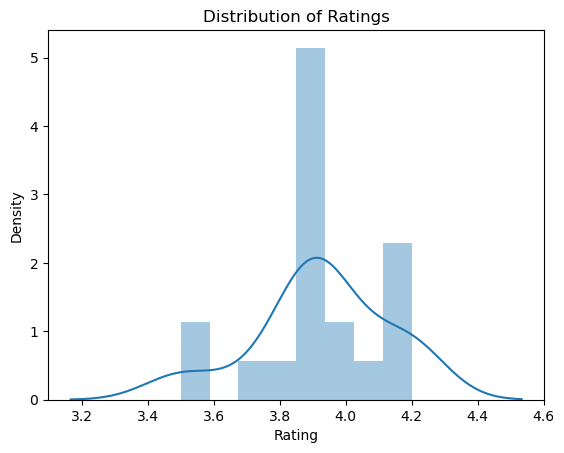

In [96]:
sns.distplot(df['Rating'])
plt.title('Distribution of Ratings')

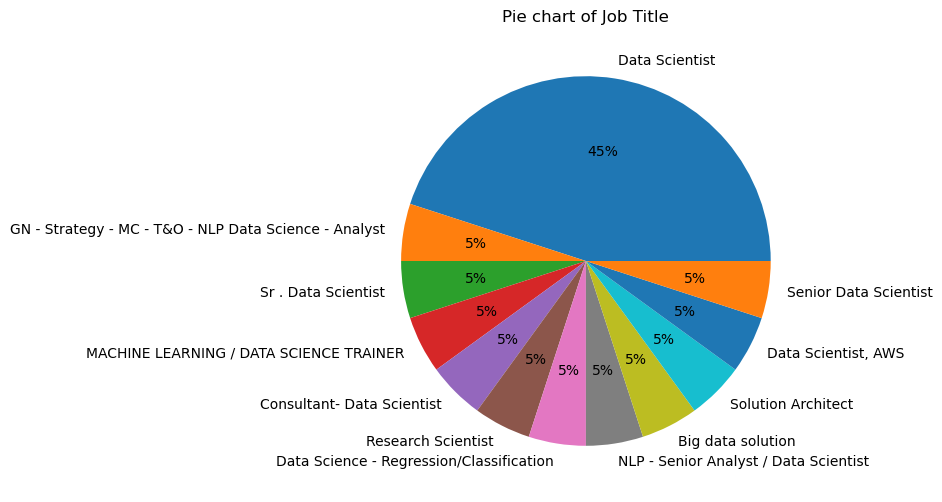

In [100]:
value_counts = df['Job Title'].value_counts()

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(value_counts, labels = value_counts.index, autopct='%1.0f%%')
plt.title('Pie chart of Job Title')
plt.show()

### Conclusion:
Based on this pie-chart 55% of the job openings are related to the specific job role, and rest is for Data Scientist role. 

<Axes: xlabel='Experience_min', ylabel='Count'>

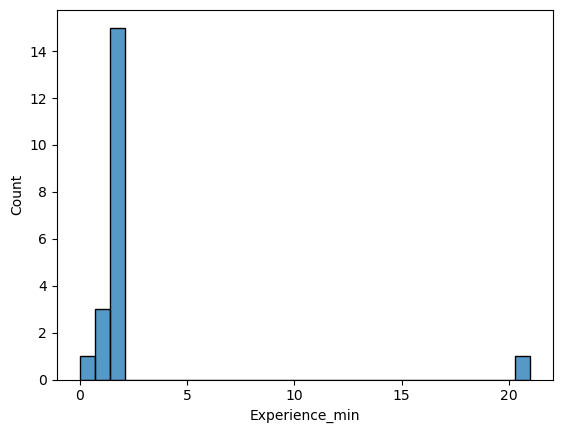

In [104]:
sns.histplot(df["Experience_min"], bins = 30)

### Conclusion :
Most of the job titles are for senior level which requires minimum of 0 - 2.5 yrs of experience. Also there are few companies which requires over 20 yrs of experience. 

<Axes: xlabel='Experience_max', ylabel='Density'>

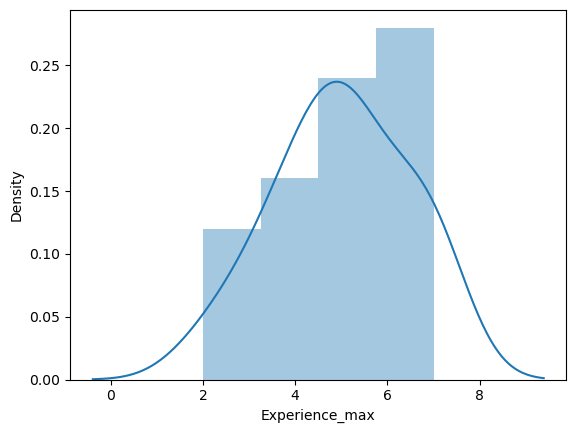

In [111]:
sns.distplot(df["Experience_max"])

### Conclusion :
In an average 5 yrs of experince is enough to get a senior level job. 